In [32]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from utils import check_and_make_dir
from scipy.optimize import curve_fit

# Glued tree graph

In [33]:
DATA_DIR = "resource_data"
TASK_DIR = "glued_trees"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

In [34]:
trotter_method = "randomized_first_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_one_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_one_qubit_gate_count_per_trotter_step']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']
y_data_binary = binary_trotter_steps * (binary_one_qubit_gate_count_per_trotter_step + binary_two_qubit_gate_count_per_trotter_step)

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_one_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_one_qubit_gate_count_per_trotter_step']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']
y_data_one_hot = one_hot_trotter_steps * (one_hot_one_qubit_gate_count_per_trotter_step + one_hot_two_qubit_gate_count_per_trotter_step)

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']
one_hot_one_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_one_qubit_gate_count_per_trotter_step_bound']
one_hot_two_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_two_qubit_gate_count_per_trotter_step_bound']
y_data_one_hot_bound = one_hot_trotter_steps_bound * (one_hot_one_qubit_gate_count_per_trotter_step_bound + one_hot_two_qubit_gate_count_per_trotter_step_bound)

Std binary: f(x) =  15.477 * x ^  2.756
Quantum walk on glued tree
One-hot: f(x) =  4.478 * x ^  2.115


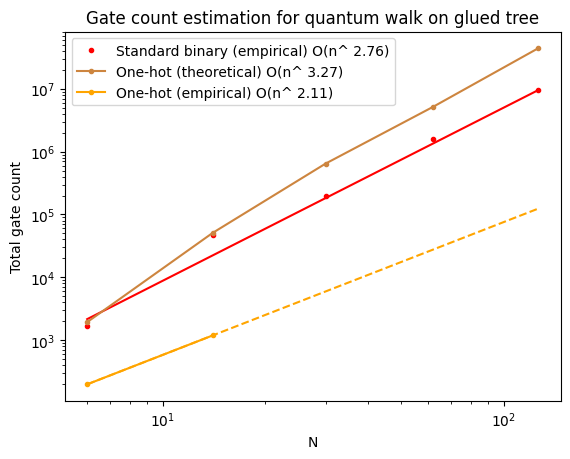

In [35]:
# # Extrapolation for one_hot
# if trotter_method == "first_order":
#     alpha_one_hot = 1
# else:
#     alpha_one_hot = 1/2
alpha_binary = np.polyfit(np.log(N_vals_binary), np.log(y_data_binary), deg=1)[0]

def func(x, c):
    return c * x ** alpha_binary

c = curve_fit(func, N_vals_binary, y_data_binary)[0][0]
print(f"Std binary: f(x) = {c: 0.3f} * x ^ {alpha_binary : 0.3f}")
y_data_binary_fit = func(N_vals_binary, c)

alpha_one_hot = np.polyfit(np.log(N_vals_one_hot), np.log(y_data_one_hot), deg=1)[0]

def func(x, c):
    return c * x ** alpha_one_hot

c = curve_fit(func, N_vals_one_hot, y_data_one_hot)[0][0]
print(f"Quantum walk on glued tree")
print(f"One-hot: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_fit = np.arange(N_vals_one_hot[0], N_vals_binary[-1]+1)
y_data_one_hot_fit = func(N_vals_one_hot_fit, c)

alpha_one_hot_bound = np.polyfit(np.log(N_vals_one_hot_bound), np.log(y_data_one_hot_bound), deg=1)[0]

plt.plot(N_vals_binary, y_data_binary, 'o', color="red", label=f"Standard binary (empirical) O(n^{alpha_binary : 0.2f})", markersize=3)
plt.plot(N_vals_binary, y_data_binary_fit, '-', color="red")

plt.plot(N_vals_one_hot_bound, y_data_one_hot_bound, '-o', color="peru", label=f"One-hot (theoretical) O(n^{alpha_one_hot_bound : 0.2f})", markersize=3)
plt.plot(N_vals_one_hot, y_data_one_hot, '-o', color="orange", label=f"One-hot (empirical) O(n^{alpha_one_hot : 0.2f})", markersize=3)
plt.plot(N_vals_one_hot_fit, y_data_one_hot_fit, '--', color='orange')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel("Total gate count")
plt.xlabel("N")
plt.title("Gate count estimation for quantum walk on glued tree")
plt.show()

# Spatial search

2D spatial search

In [36]:
DATA_DIR = "resource_data"
TASK_DIR = "spatial_search_2d"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

dimension = 2

In [37]:
trotter_method = "second_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}_pad_zeros.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_one_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_one_qubit_gate_count_per_trotter_step']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']
y_data_binary = binary_trotter_steps * (binary_one_qubit_gate_count_per_trotter_step + binary_two_qubit_gate_count_per_trotter_step)

resource_estimation_unary = np.load(join(CURR_DIR, f"unary_{trotter_method}.npz"))
N_vals_unary = resource_estimation_unary["N_vals_unary"]
unary_trotter_steps = resource_estimation_unary['unary_trotter_steps']
unary_one_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_one_qubit_gate_count_per_trotter_step']
unary_two_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_two_qubit_gate_count_per_trotter_step']
y_data_unary = unary_trotter_steps * (unary_one_qubit_gate_count_per_trotter_step + unary_two_qubit_gate_count_per_trotter_step)

resource_estimation_unary_bound = np.load(join(CURR_DIR, f"unary_{trotter_method}_bound.npz"))
N_vals_unary_bound = resource_estimation_unary_bound["N_vals_unary_bound"]
unary_trotter_steps_bound = resource_estimation_unary_bound['unary_trotter_steps_bound']
unary_one_qubit_gate_count_per_trotter_step_bound = resource_estimation_unary_bound['unary_one_qubit_gate_count_per_trotter_step_bound']
unary_two_qubit_gate_count_per_trotter_step_bound = resource_estimation_unary_bound['unary_two_qubit_gate_count_per_trotter_step_bound']
y_data_unary_bound = unary_trotter_steps_bound * (unary_one_qubit_gate_count_per_trotter_step_bound + unary_two_qubit_gate_count_per_trotter_step_bound)

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_one_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_one_qubit_gate_count_per_trotter_step']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']
y_data_one_hot = one_hot_trotter_steps * (one_hot_one_qubit_gate_count_per_trotter_step + one_hot_two_qubit_gate_count_per_trotter_step)

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']
one_hot_one_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_one_qubit_gate_count_per_trotter_step_bound']
one_hot_two_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_two_qubit_gate_count_per_trotter_step_bound']
y_data_one_hot_bound = one_hot_trotter_steps_bound * (one_hot_one_qubit_gate_count_per_trotter_step_bound + one_hot_two_qubit_gate_count_per_trotter_step_bound)

2D spatial search
Std binary: f(x) =  8.239 * x ^  6.004
Unary: f(x) =  0.249 * x ^  6.631
One-hot: f(x) =  3.046 * x ^  3.577


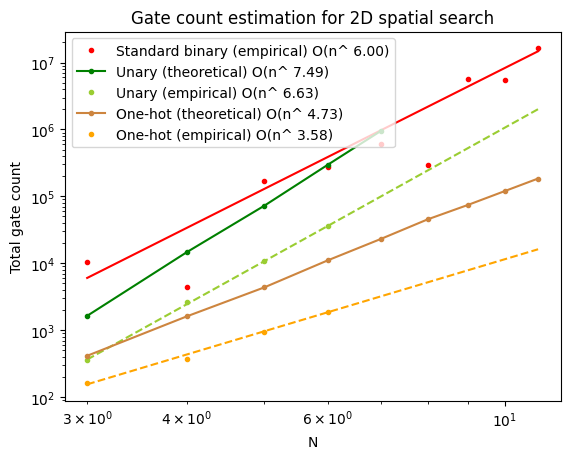

In [38]:

print(f"2D spatial search")
alpha_binary = np.polyfit(np.log(N_vals_binary), np.log(y_data_binary), deg=1)[0]

def func(x, c):
    return c * x ** alpha_binary

c = curve_fit(func, N_vals_binary, y_data_binary)[0][0]
print(f"Std binary: f(x) = {c: 0.3f} * x ^ {alpha_binary : 0.3f}")
y_data_binary_fit = func(N_vals_binary, c)

# if trotter_method == "first_order":
#     alpha_unary = 2
# else:
#     alpha_unary = 3/2

alpha_unary = np.polyfit(np.log(N_vals_unary), np.log(y_data_unary), deg=1)[0]

def func(x, c):
    return c * x ** alpha_unary

c = curve_fit(func, N_vals_unary, y_data_unary)[0][0]
print(f"Unary: f(x) = {c: 0.3f} * x ^ {alpha_unary : 0.3f}")

N_vals_unary_fit = np.arange(N_vals_unary[0], N_vals_binary[-1]+1)
y_data_unary_fit = func(N_vals_unary_fit, c)

# # Extrapolation for one_hot
# if trotter_method == "first_order":
#     alpha_one_hot = 1
# else:
#     alpha_one_hot = 1/2

alpha_one_hot = np.polyfit(np.log(N_vals_one_hot), np.log(y_data_one_hot), deg=1)[0]

def func(x, c):
    return c * x ** alpha_one_hot

c = curve_fit(func, N_vals_one_hot, y_data_one_hot)[0][0]
print(f"One-hot: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_fit = np.arange(N_vals_one_hot[0], N_vals_binary[-1]+1)
y_data_one_hot_fit = func(N_vals_one_hot_fit, c)

alpha_unary_bound = np.polyfit(np.log(N_vals_unary_bound), np.log(y_data_unary_bound), deg=1)[0]
alpha_one_hot_bound = np.polyfit(np.log(N_vals_one_hot_bound), np.log(y_data_one_hot_bound), deg=1)[0]


plt.plot(N_vals_binary, y_data_binary, 'o', color="red", label=f"Standard binary (empirical) O(n^{alpha_binary : 0.2f})", markersize=3)
plt.plot(N_vals_binary, y_data_binary_fit, '-', color="red")

plt.plot(N_vals_unary_bound, y_data_unary_bound, '-o', color="green", label=f"Unary (theoretical) O(n^{alpha_unary_bound : 0.2f})", markersize=3)
plt.plot(N_vals_unary, y_data_unary, 'o', color="yellowgreen", label=f"Unary (empirical) O(n^{alpha_unary : 0.2f})", markersize=3)
plt.plot(N_vals_unary_fit, y_data_unary_fit, '--', color='yellowgreen')

plt.plot(N_vals_one_hot_bound, y_data_one_hot_bound, '-o', color="peru", label=f"One-hot (theoretical) O(n^{alpha_one_hot_bound : 0.2f})", markersize=3)
plt.plot(N_vals_one_hot, y_data_one_hot, 'o', color="orange", label=f"One-hot (empirical) O(n^{alpha_one_hot : 0.2f})", markersize=3)
plt.plot(N_vals_one_hot_fit, y_data_one_hot_fit, '--', color='orange')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("Total gate count")
plt.xlabel("N")
plt.title("Gate count estimation for 2D spatial search")
plt.show()

3D spatial search

In [39]:
DATA_DIR = "resource_data"
TASK_DIR = "spatial_search_3d"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

dimension = 3

In [40]:
trotter_method = "second_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}_pad_zeros.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_one_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_one_qubit_gate_count_per_trotter_step']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']
y_data_binary = binary_trotter_steps * (binary_one_qubit_gate_count_per_trotter_step + binary_two_qubit_gate_count_per_trotter_step)

resource_estimation_unary = np.load(join(CURR_DIR, f"unary_{trotter_method}.npz"))
N_vals_unary = resource_estimation_unary["N_vals_unary"]
unary_trotter_steps = resource_estimation_unary['unary_trotter_steps']
unary_one_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_one_qubit_gate_count_per_trotter_step']
unary_two_qubit_gate_count_per_trotter_step = resource_estimation_unary['unary_two_qubit_gate_count_per_trotter_step']
y_data_unary = unary_trotter_steps * (unary_one_qubit_gate_count_per_trotter_step + unary_two_qubit_gate_count_per_trotter_step)

resource_estimation_unary_bound = np.load(join(CURR_DIR, f"unary_{trotter_method}_bound.npz"))
N_vals_unary_bound = resource_estimation_unary_bound["N_vals_unary_bound"]
unary_trotter_steps_bound = resource_estimation_unary_bound['unary_trotter_steps_bound']
unary_one_qubit_gate_count_per_trotter_step_bound = resource_estimation_unary_bound['unary_one_qubit_gate_count_per_trotter_step_bound']
unary_two_qubit_gate_count_per_trotter_step_bound = resource_estimation_unary_bound['unary_two_qubit_gate_count_per_trotter_step_bound']
y_data_unary_bound = unary_trotter_steps_bound * (unary_one_qubit_gate_count_per_trotter_step_bound + unary_two_qubit_gate_count_per_trotter_step_bound)

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_one_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_one_qubit_gate_count_per_trotter_step']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']
y_data_one_hot = one_hot_trotter_steps * (one_hot_one_qubit_gate_count_per_trotter_step + one_hot_two_qubit_gate_count_per_trotter_step)

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']
one_hot_one_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_one_qubit_gate_count_per_trotter_step_bound']
one_hot_two_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_two_qubit_gate_count_per_trotter_step_bound']
y_data_one_hot_bound = one_hot_trotter_steps_bound * (one_hot_one_qubit_gate_count_per_trotter_step_bound + one_hot_two_qubit_gate_count_per_trotter_step_bound)

3D spatial search
Std binary: f(x) =  157.267 * x ^  4.961
Unary: f(x) =  1.189 * x ^  6.235
One-hot: f(x) =  12.778 * x ^  2.849


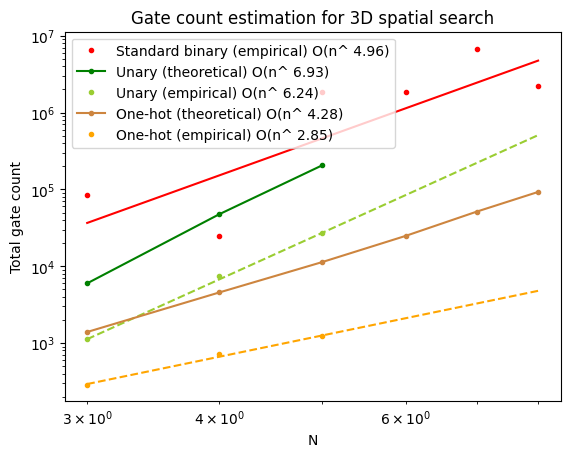

In [41]:

print(f"3D spatial search")
alpha_binary = np.polyfit(np.log(N_vals_binary), np.log(y_data_binary), deg=1)[0]

def func(x, c):
    return c * x ** alpha_binary

c = curve_fit(func, N_vals_binary, y_data_binary)[0][0]
print(f"Std binary: f(x) = {c: 0.3f} * x ^ {alpha_binary : 0.3f}")
y_data_binary_fit = func(N_vals_binary, c)

# if trotter_method == "first_order":
#     alpha_unary = 2
# else:
#     alpha_unary = 3/2

alpha_unary = np.polyfit(np.log(N_vals_unary), np.log(y_data_unary), deg=1)[0]

def func(x, c):
    return c * x ** alpha_unary

c = curve_fit(func, N_vals_unary, y_data_unary)[0][0]
print(f"Unary: f(x) = {c: 0.3f} * x ^ {alpha_unary : 0.3f}")

N_vals_unary_fit = np.arange(N_vals_unary[0], N_vals_binary[-1]+1)
y_data_unary_fit = func(N_vals_unary_fit, c)

# # Extrapolation for one_hot
# if trotter_method == "first_order":
#     alpha_one_hot = 1
# else:
#     alpha_one_hot = 1/2

alpha_one_hot = np.polyfit(np.log(N_vals_one_hot), np.log(y_data_one_hot), deg=1)[0]

def func(x, c):
    return c * x ** alpha_one_hot

c = curve_fit(func, N_vals_one_hot, y_data_one_hot)[0][0]
print(f"One-hot: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_fit = np.arange(N_vals_one_hot[0], N_vals_binary[-1]+1)
y_data_one_hot_fit = func(N_vals_one_hot_fit, c)

alpha_unary_bound = np.polyfit(np.log(N_vals_unary_bound), np.log(y_data_unary_bound), deg=1)[0]
alpha_one_hot_bound = np.polyfit(np.log(N_vals_one_hot_bound), np.log(y_data_one_hot_bound), deg=1)[0]


plt.plot(N_vals_binary, y_data_binary, 'o', color="red", label=f"Standard binary (empirical) O(n^{alpha_binary : 0.2f})", markersize=3)
plt.plot(N_vals_binary, y_data_binary_fit, '-', color="red")

plt.plot(N_vals_unary_bound, y_data_unary_bound, '-o', color="green", label=f"Unary (theoretical) O(n^{alpha_unary_bound : 0.2f})", markersize=3)
plt.plot(N_vals_unary, y_data_unary, 'o', color="yellowgreen", label=f"Unary (empirical) O(n^{alpha_unary : 0.2f})", markersize=3)
plt.plot(N_vals_unary_fit, y_data_unary_fit, '--', color='yellowgreen')

plt.plot(N_vals_one_hot_bound, y_data_one_hot_bound, '-o', color="peru", label=f"One-hot (theoretical) O(n^{alpha_one_hot_bound : 0.2f})", markersize=3)
plt.plot(N_vals_one_hot, y_data_one_hot, 'o', color="orange", label=f"One-hot (empirical) O(n^{alpha_one_hot : 0.2f})", markersize=3)
plt.plot(N_vals_one_hot_fit, y_data_one_hot_fit, '--', color='orange')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("Total gate count")
plt.xlabel("N")
plt.title("Gate count estimation for 3D spatial search")
plt.show()

# Real-space simulation

In [42]:
DATA_DIR = "resource_data"
TASK_DIR = "real_space"

CURR_DIR = DATA_DIR
check_and_make_dir(CURR_DIR)
CURR_DIR = join(CURR_DIR, TASK_DIR)
check_and_make_dir(CURR_DIR)

In [43]:
trotter_method = "randomized_first_order"

resource_estimation_binary = np.load(join(CURR_DIR, f"std_binary_{trotter_method}_pad_zeros.npz"))
N_vals_binary = resource_estimation_binary['N_vals_binary']
binary_trotter_steps = resource_estimation_binary['binary_trotter_steps']
binary_one_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_one_qubit_gate_count_per_trotter_step']
binary_two_qubit_gate_count_per_trotter_step = resource_estimation_binary['binary_two_qubit_gate_count_per_trotter_step']
y_data_binary = binary_trotter_steps * (binary_one_qubit_gate_count_per_trotter_step + binary_two_qubit_gate_count_per_trotter_step)

resource_estimation_one_hot = np.load(join(CURR_DIR, f"one_hot_{trotter_method}.npz"))
N_vals_one_hot = resource_estimation_one_hot["N_vals_one_hot"]
one_hot_trotter_steps = resource_estimation_one_hot['one_hot_trotter_steps']
one_hot_one_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_one_qubit_gate_count_per_trotter_step']
one_hot_two_qubit_gate_count_per_trotter_step = resource_estimation_one_hot['one_hot_two_qubit_gate_count_per_trotter_step']
y_data_one_hot = one_hot_trotter_steps * (one_hot_one_qubit_gate_count_per_trotter_step + one_hot_two_qubit_gate_count_per_trotter_step)

resource_estimation_one_hot_bound = np.load(join(CURR_DIR, f"one_hot_{trotter_method}_bound.npz"))
N_vals_one_hot_bound = resource_estimation_one_hot_bound["N_vals_one_hot_bound"]
one_hot_trotter_steps_bound = resource_estimation_one_hot_bound['one_hot_trotter_steps_bound']
one_hot_one_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_one_qubit_gate_count_per_trotter_step_bound']
one_hot_two_qubit_gate_count_per_trotter_step_bound = resource_estimation_one_hot_bound['one_hot_two_qubit_gate_count_per_trotter_step_bound']
y_data_one_hot_bound = one_hot_trotter_steps_bound * (one_hot_one_qubit_gate_count_per_trotter_step_bound + one_hot_two_qubit_gate_count_per_trotter_step_bound)

Real space simulation
Std binary: f(x) =  150.755 * x ^  2.376
One-hot: f(x) =  19.877 * x ^  2.423


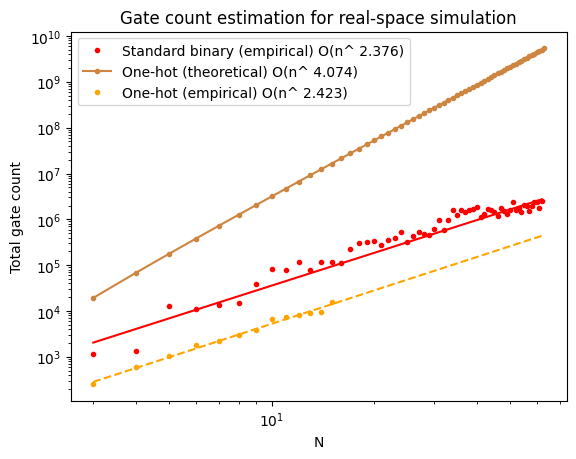

In [44]:

print(f"Real space simulation")
# # Extrapolation for one_hot
# if trotter_method == "first_order":
#     alpha_one_hot = 1
# else:
#     alpha_one_hot = 1/2

alpha_binary = np.polyfit(np.log(N_vals_binary), np.log(y_data_binary), deg=1)[0]

def func(x, c):
    return c * x ** alpha_binary

c = curve_fit(func, N_vals_binary, y_data_binary)[0][0]
print(f"Std binary: f(x) = {c: 0.3f} * x ^ {alpha_binary : 0.3f}")
y_data_binary_fit = func(N_vals_binary, c)

alpha_one_hot = np.polyfit(np.log(N_vals_one_hot), np.log(y_data_one_hot), deg=1)[0]

def func(x, c):
    return c * x ** alpha_one_hot

c = curve_fit(func, N_vals_one_hot, y_data_one_hot)[0][0]
print(f"One-hot: f(x) = {c: 0.3f} * x ^ {alpha_one_hot : 0.3f}")

N_vals_one_hot_fit = np.arange(N_vals_one_hot[0], N_vals_binary[-1]+1)
y_data_one_hot_fit = func(N_vals_one_hot_fit, c)

alpha_one_hot_bound = np.polyfit(np.log(N_vals_one_hot_bound), np.log(y_data_one_hot_bound), deg=1)[0]

plt.plot(N_vals_binary, y_data_binary, 'o', color="red", label=f"Standard binary (empirical) O(n^{alpha_binary : 0.3f})", markersize=3)
plt.plot(N_vals_binary, y_data_binary_fit, '-', color="red")
plt.plot(N_vals_one_hot_bound, y_data_one_hot_bound, '-o', color="peru", label=f"One-hot (theoretical) O(n^{alpha_one_hot_bound : 0.3f})", markersize=3)
plt.plot(N_vals_one_hot, y_data_one_hot, 'o', color="orange", label=f"One-hot (empirical) O(n^{alpha_one_hot : 0.3f})", markersize=3)
plt.plot(N_vals_one_hot_fit, y_data_one_hot_fit, '--', color='orange')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel("Total gate count")
plt.xlabel("N")
plt.title("Gate count estimation for real-space simulation")
plt.show()